In [ ]:
import numpy as np
import scipy as sp
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering, KMeans, DBSCAN
from sklearn.neighbors import NearestNeighbors
from kneed import KneeLocator



In [ ]:
!pip install kneed

In [ ]:
url = "https://raw.githubusercontent.com/pedroteche-ih/DAFT_MEX_202209/main/data/tb_ames_housing.csv"
tb_housing = pd.read_csv(url)
tb_housing_num = (
    tb_housing.select_dtypes(include="number")
    .dropna()
    .drop(["Id", "MSSubClass"], axis=1)
)
clu_vars = [
    "LotFrontage",
    "LotArea",
    "OverallQual",
    "OverallCond",
    "YearBuilt",
    "YearRemodAdd",
    "MasVnrArea",
    "BsmtFinSF1",
    "BsmtFinSF2",
    "BsmtUnfSF",
    "TotalBsmtSF",
    "1stFlrSF",
    "2ndFlrSF",
    "LowQualFinSF",
    "GrLivArea",
    "BsmtFullBath",
    "BsmtHalfBath",
    "FullBath",
    "HalfBath",
    "BedroomAbvGr",
    "KitchenAbvGr",
    "TotRmsAbvGrd",
    "Fireplaces",
    "GarageYrBlt",
    "GarageCars",
    "GarageArea",
    "WoodDeckSF",
    "OpenPorchSF",
    "EnclosedPorch",
    "3SsnPorch",
    "ScreenPorch",
    "PoolArea",
    "MiscVal",
    "MoSold",
    "YrSold",
    "SalePrice",
]


# Agglomerative Clustering of Variables

In [ ]:
from sklearn.cluster import FeatureAgglomeration

In [ ]:
scaler = StandardScaler()
tb_sca_housing_num = scaler.fit_transform(tb_housing_num[clu_vars])


In [ ]:
tb_sca_housing_num

In [ ]:
tb_sca_housing_num.T.shape


In [ ]:
fig = plt.figure(figsize=(15, 5))
link = linkage(tb_sca_housing_num.T, method="complete", metric="cosine")
housing_dendogram = dendrogram(link, labels=scaler.feature_names_in_)


In [ ]:
clu_0 = [
    "BsmtUnfSF",
    "OpenPorchSF",
    "YearRemodAdd",
    "YearBuilt",
    "GarageYrBlt",
    "OverallQual",
    "FullBath",
]
sns.heatmap(tb_housing_num[clu_0].corr(), vmin=-1, center=0, vmax=1)


In [ ]:
sns.clustermap(tb_housing_num.corr())

In [ ]:
n = 10
var_fit = FeatureAgglomeration(n_clusters=n)
var_fit.fit(tb_sca_housing_num)


In [ ]:
tb_var_cluster = pd.DataFrame(
    var_fit.transform(tb_sca_housing_num), columns=["CLU_" + str(i) for i in range(n)]
)

In [ ]:
tb_var_cluster

# Multi-Dimensional Scaling (MDS)

A *non-linear* version of PCA.

## Using MDS to visualize cluster separation

In [ ]:
from sklearn.manifold import MDS

In [ ]:
url = 'https://raw.githubusercontent.com/pedroteche-ih/DAFT_MEX_202209/main/data/nypd_crime_pct.csv'
tb_nypd = pd.read_csv(url)

cluster_vars = ['assault_3_&_related_offenses', 'criminal_mischief_&_related_of',
       'dangerous_drugs', 'felony_assault', 'grand_larceny', 'harrassment_2',
       'miscellaneous_penal_law', 'off._agnst_pub_ord_sensblty_&',
       'petit_larceny', 'robbery']

nypd_scaler = StandardScaler()
nypd_scaler.fit(tb_nypd[cluster_vars])

tb_sca_nypd = pd.DataFrame(nypd_scaler.transform(tb_nypd[cluster_vars]), columns = cluster_vars)
tb_sca_nypd.index = tb_nypd['ADDR_PCT_CD']

hc_fit = AgglomerativeClustering(n_clusters = 5, 
                                 affinity='euclidean', 
                                 linkage='ward')
hc_fit.fit(tb_sca_nypd)
tb_sca_nypd['clu_ward'] = [str(x) for x in hc_fit.labels_]
tb_nypd['clu_ward'] = [str(x) for x in hc_fit.labels_]

In [ ]:
tb_sca_nypd

In [28]:
mds_fit = MDS(n_components=2)
mds_array = mds_fit.fit_transform(tb_sca_nypd[cluster_vars])

tb_mca_nypd = pd.DataFrame(
    mds_array,
    columns = ['MC_0', 'MC_1']
)

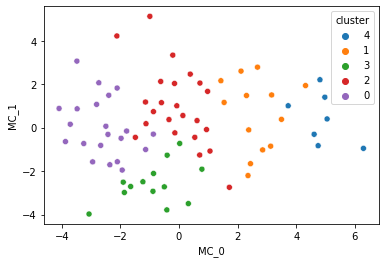

In [29]:
tb_mca_nypd['cluster'] = [str(x) for x in hc_fit.labels_]
sns.scatterplot(data = tb_mca_nypd, x = 'MC_0', y = 'MC_1', hue = 'cluster')

## Using MDS for Clustering

In [31]:
url = 'https://raw.githubusercontent.com/pedroteche-ih/DAFT_MEX_202209/main/data/tb_household_electricity.csv'
tb_house = pd.read_csv(url, parse_dates = ['date_time'])
tb_house = tb_house.sample(1000, random_state=42).copy()
clu_vars_h = ['sub_metering_1', 'sub_metering_2', 'sub_metering_3', 'voltage', 'global_intensity']
tb_house['hour'] = tb_house['date_time'].dt.hour
tb_house = tb_house.drop('date_time', axis = 1)

scaler = StandardScaler()
scaler.fit(tb_house[clu_vars_h])
tb_sca_cp = pd.DataFrame(
    scaler.transform(tb_house[clu_vars_h]),
    columns = scaler.feature_names_in_
)

tb_sca_cp.head()

,sub_metering_1,sub_metering_2,sub_metering_3,voltage,global_intensity
0,-0.176843,-0.228821,-0.759886,-1.474494,1.097241
1,-0.176843,-0.228821,1.398199,1.412792,0.331011
2,-0.176843,-0.228821,-0.759886,-1.424171,-0.750725
3,3.383750,-0.228821,1.278306,-1.842482,3.891725
4,-0.176843,-0.228821,-0.759886,0.761737,-0.795797


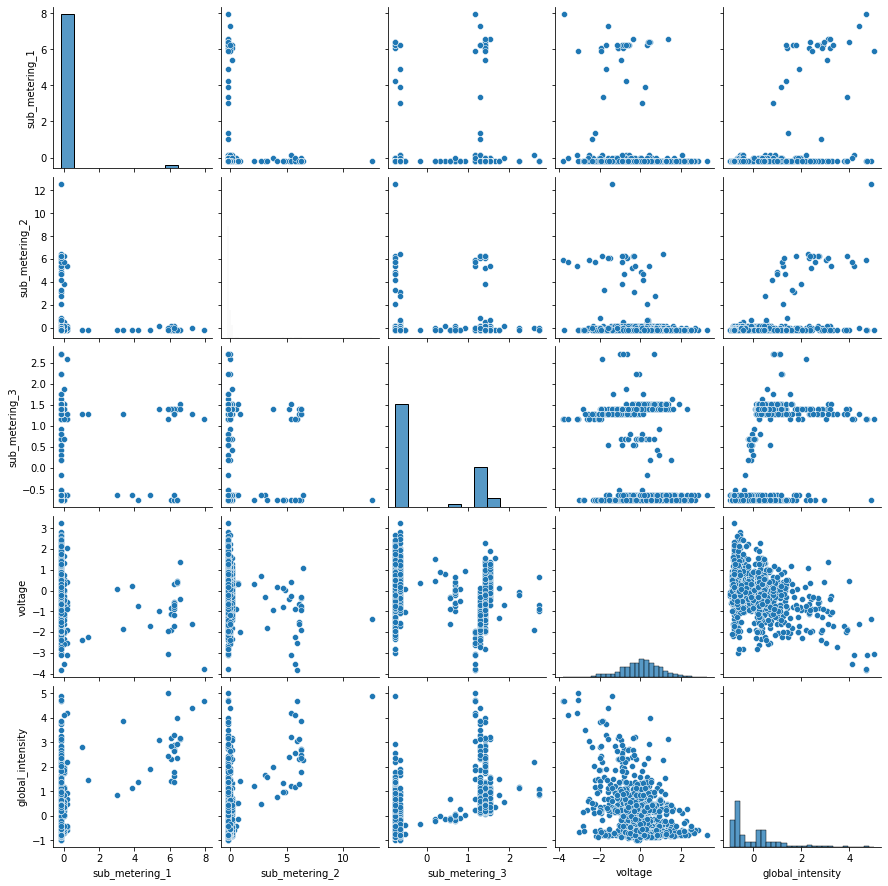

In [32]:
sns.pairplot(tb_sca_cp)

In [33]:
mds_fit = MDS(n_components=2)
tb_mca_house = pd.DataFrame(
    mds_fit.fit_transform(tb_sca_cp),
    columns = ['MC_0', 'MC_1']
)
tb_house_mca = pd.concat([tb_house, tb_mca_house], axis = 1)

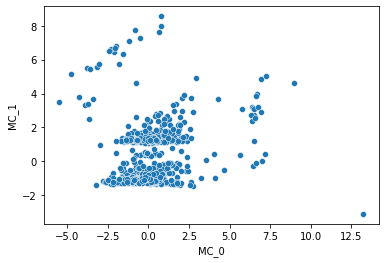

In [34]:
sns.scatterplot(data = tb_mca_house, x = 'MC_0', y = 'MC_1')

In [35]:
km_fit = KMeans(n_clusters = 4)
km_fit.fit(tb_mca_house)

KMeans(n_clusters=4)

In [37]:
tb_sca_cp['cluster'] = km_fit.labels_


In [44]:
tb_sca_cp['ID'] = tb_house.index
tb_house_melt = tb_sca_cp.melt(id_vars = ['ID', 'cluster'])
tb_sca_cp.head()

,sub_metering_1,sub_metering_2,sub_metering_3,voltage,global_intensity,cluster,ID
0,-0.176843,-0.228821,-0.759886,-1.474494,1.097241,2,6252
1,-0.176843,-0.228821,1.398199,1.412792,0.331011,2,4684
2,-0.176843,-0.228821,-0.759886,-1.424171,-0.750725,0,1731
3,3.383750,-0.228821,1.278306,-1.842482,3.891725,1,4742
4,-0.176843,-0.228821,-0.759886,0.761737,-0.795797,0,4521


In [45]:
tb_house_melt.head()

,ID,cluster,variable,value
0,6252,2,sub_metering_1,-0.176843
1,4684,2,sub_metering_1,-0.176843
2,1731,0,sub_metering_1,-0.176843
3,4742,1,sub_metering_1,3.383750
4,4521,0,sub_metering_1,-0.176843


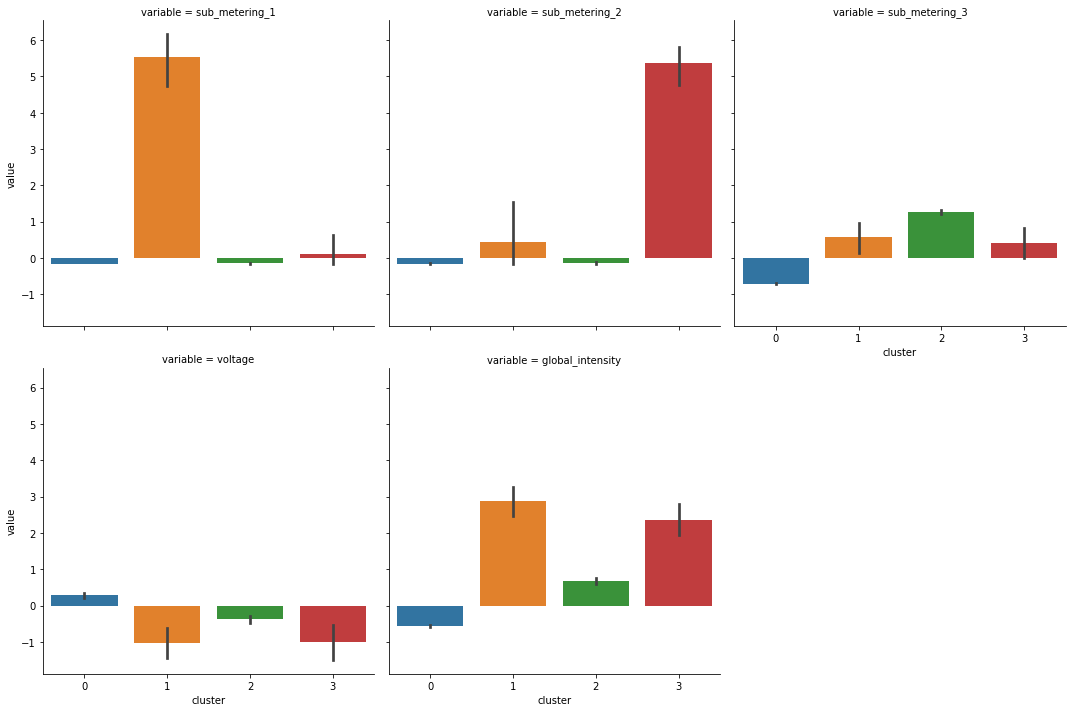

In [39]:
sns.catplot(data = tb_house_melt, x = 'cluster', y = 'value', col= 'variable', kind = 'bar', col_wrap = 3)

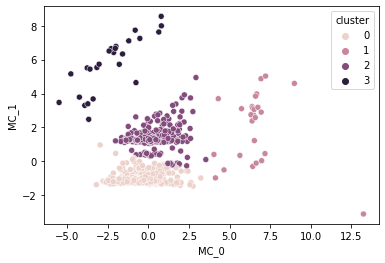

In [46]:
tb_mca_house['cluster'] = km_fit.labels_
sns.scatterplot(data = tb_mca_house, x = 'MC_0', y = 'MC_1', hue = 'cluster')

In [54]:
neighbors = 25
nbrs = NearestNeighbors(n_neighbors=neighbors)
nbrs.fit(tb_mca_house)

distances, indices = nbrs.kneighbors(tb_mca_house)
distance_desc = sorted(distances[:,-1], reverse=True)

kneedle = KneeLocator(range(1,len(distance_desc)+1),  #x values
                      distance_desc,
                      S=2,
                      curve="convex",
                      direction="decreasing")
                      
print(f"Optimal Knee found at eps = {np.round(kneedle.knee_y, 2)}\nwith min_samples = {neighbors}")

Optimal Knee found at eps = 1.64
with min_samples = 25


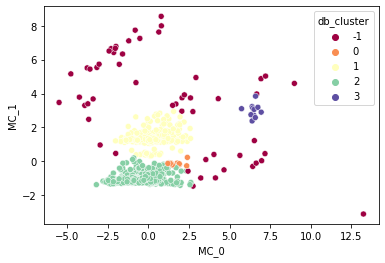

In [58]:
db_fit = DBSCAN(eps = 0.7, min_samples = 10)
db_fit.fit(tb_mca_house)
tb_mca_house['db_cluster'] = db_fit.labels_
sns.scatterplot(data = tb_mca_house, x = 'MC_0', y = 'MC_1', hue = 'db_cluster', palette='Spectral')

In [59]:
tb_sca_cp['db_cluster'] = db_fit.labels_
tb_house_melt = tb_sca_cp.melt(id_vars = ['ID', 'cluster', 'db_cluster'])

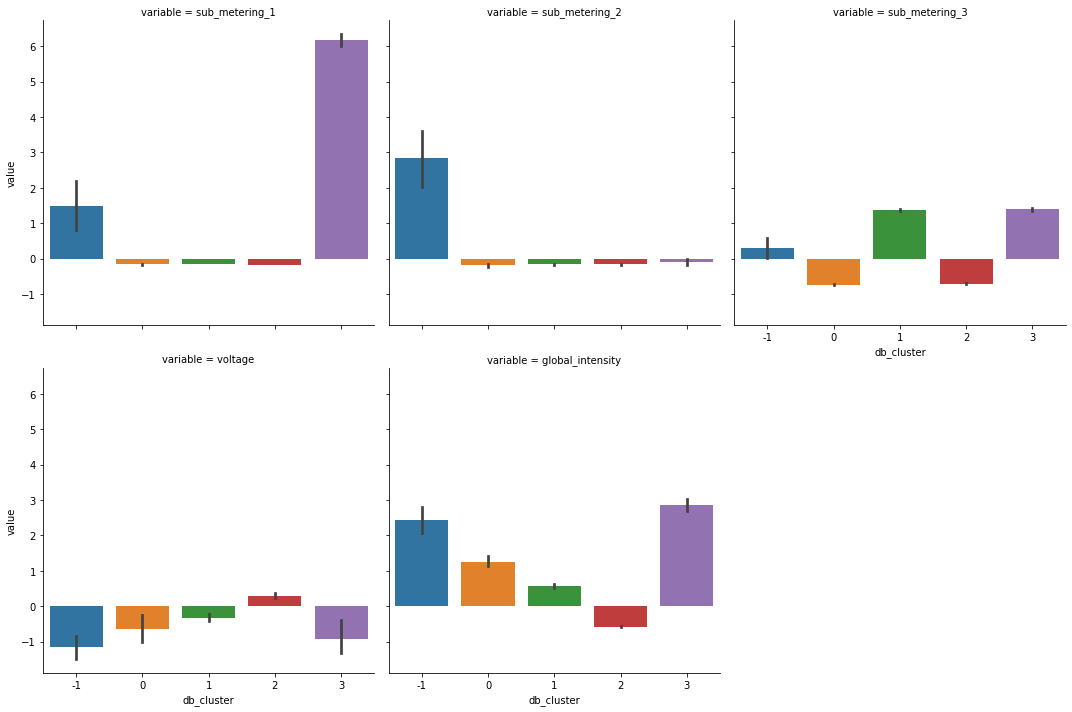

In [60]:
sns.catplot(data = tb_house_melt, x = 'db_cluster', y = 'value', col= 'variable', kind = 'bar', col_wrap = 3)

# Using t-SNE to Visualize Data

In [66]:
tb_sca_cp

,sub_metering_1,sub_metering_2,sub_metering_3,voltage,global_intensity,cluster,ID,db_cluster
0,-0.176843,-0.228821,-0.759886,-1.474494,1.097241,2,6252,0
1,-0.176843,-0.228821,1.398199,1.412792,0.331011,2,4684,1
2,-0.176843,-0.228821,-0.759886,-1.424171,-0.750725,0,1731,2
3,3.383750,-0.228821,1.278306,-1.842482,3.891725,1,4742,-1
4,-0.176843,-0.228821,-0.759886,0.761737,-0.795797,0,4521,2
...,...,...,...,...,...,...,...,...
995,-0.176843,-0.228821,-0.639992,0.179877,-0.795797,0,3921,2
996,-0.176843,6.258817,1.278306,-0.329644,2.494483,3,6685,-1
997,-0.176843,-0.228821,-0.639992,0.815205,-0.795797,0,3194,2
998,-0.176843,-0.228821,1.398199,-0.225853,0.421156,2,1941,1


In [61]:
from sklearn.manifold import TSNE

In [68]:
tsne_fit = TSNE(init = 'pca', learning_rate = 'auto', perplexity=10)
array_tsne = tsne_fit.fit_transform(tb_sca_cp.drop(['ID', 'cluster', 'db_cluster'], axis = 1))


tb_tsne_house = pd.DataFrame(
    array_tsne,
    columns = ['TS_1', 'TS_2']
)

tb_tsne_house['cluster'] = tb_sca_cp['cluster']
tb_tsne_house['db_cluster'] = tb_sca_cp['db_cluster']

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:986: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  FutureWarning,


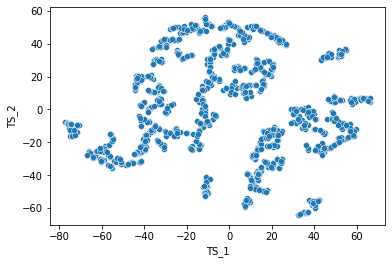

In [72]:
sns.scatterplot(data = tb_tsne_house, x = 'TS_1', y = 'TS_2', palette='Spectral')